In [ ]:
 import os

# 현재 폴더 위치
 os.getcwd()

 os.listdir()

['.config', 'drinks.csv', 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drinks.csv"

drinks = pd.read_csv(file_path)

print(drinks.info())

print("\n-------------------------------\n")

drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None

-------------------------------



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [ ]:
# 기초통계량 분석
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [ ]:
# 단순상관분석
# 다중상관분석

In [ ]:
# 1. 맥주와 와인 소비량의 상관관계
corr = drinks[["beer_servings", "wine_servings"]].corr(method="pearson")

corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [ ]:
# 다중상관분석
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [ ]:
# seaborn 시각화 라이브러리 필요
# heatmap, pairplot을 사용하기 위함
!pip install seaborn

In [ ]:
corr.values

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

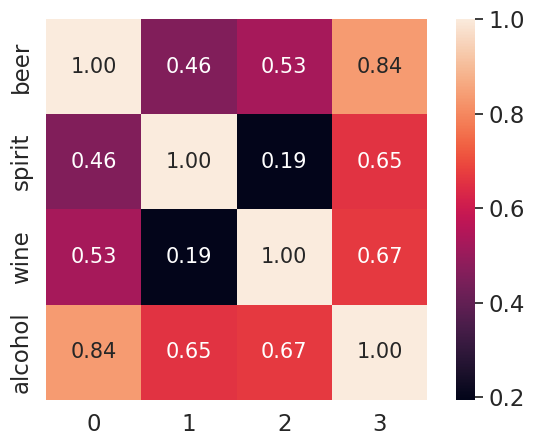

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵으로 시각화
cols_view = ["beer", "spirit", "wine", "alcohol"]
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values, cbar=True, annot = True, square=True, fmt=".2f", annot_kws = {'size': 15}, yticklabels=cols_view)

plt.tight_layout()
plt.show()


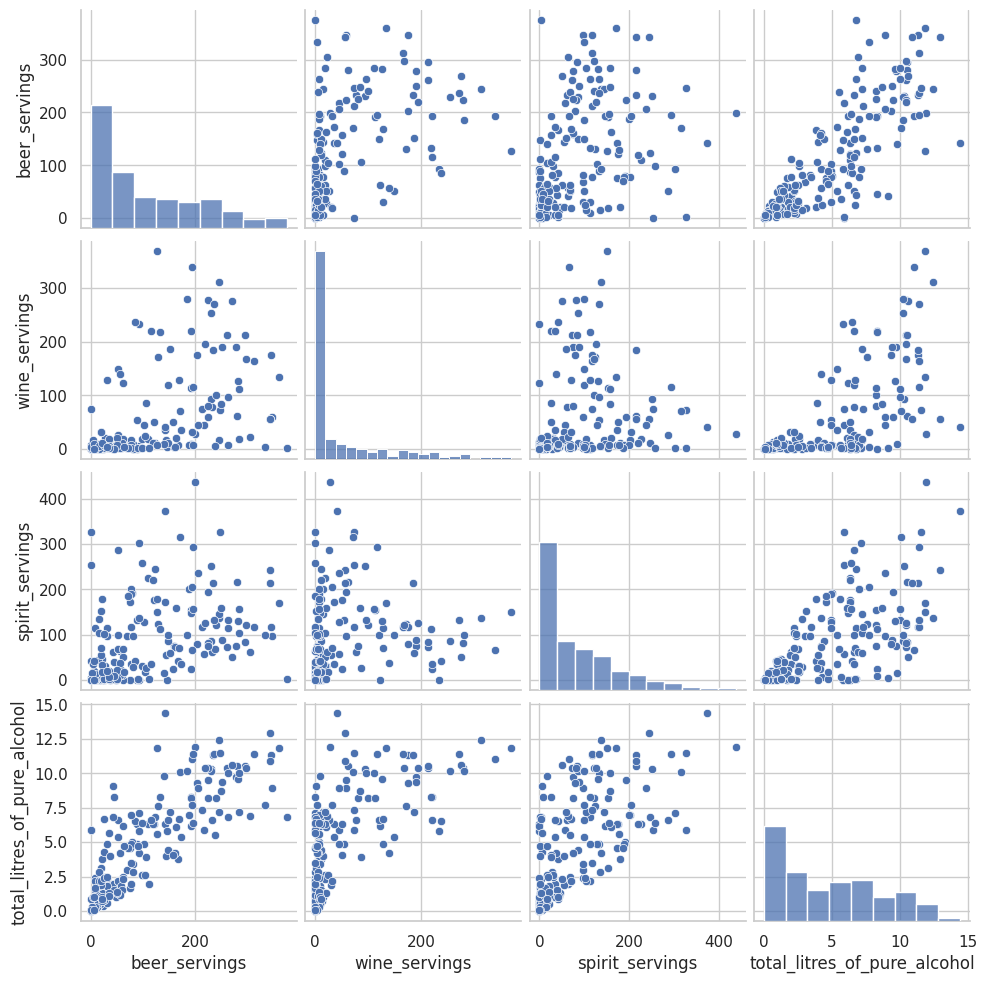

In [ ]:
# 피처 간의 산점도 그래프 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'wine_servings', 'spirit_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [ ]:
# 결측 데이터 처리: 기타 대륙으로 통합(OT) -> others

drinks['continent'] = drinks['continent'].fillna('OT')

drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


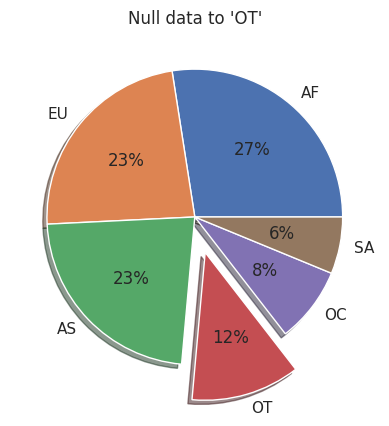

In [ ]:
# 파이차트로 시각화
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode=(0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('Null data to \'OT\'')
plt.show()

In [ ]:
fracs1

[53, 45, 44, 23, 16, 12]

In [ ]:
# agg() 메서드는 파라미터를 병렬로 설정해서 그룹에 대해서 연산 결과를 동시에 얻을 수 있음
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계

result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [ ]:
# 정의: 전세계 전체 평균보다 많은 알콜을 섭취하는 대륙이 어디인가?
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
total_mean

4.717098445595855

In [ ]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()

beer_continent

'EU'

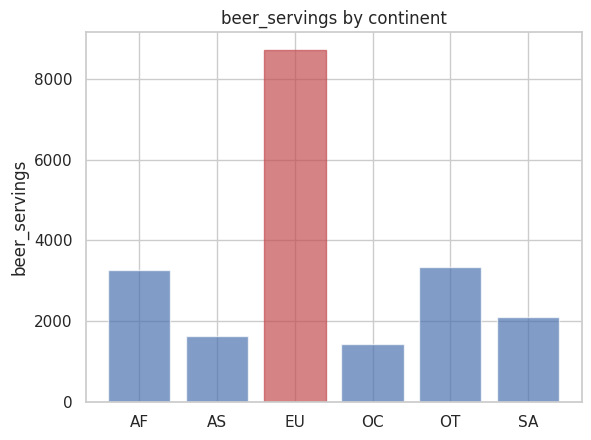

In [ ]:
# 정의: 대륙별 beer_servings 소비량을 시각적으로 확인하고 싶다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))

alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.7)
bar_list[continents.index('EU')].set_color('r')

plt.xticks(y_pos, continents)

plt.ylabel('beer_servings')

plt.title('beer_servings by continent')

plt.show()